# Project One: Due September 12, 2022, 11:59PM

In [1]:
# Required Header
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import collections
import pandas as pd
import random

## Get a edge list data set
### 1. Download a edge list that has more than 1000 nodes. Careful not to pick very large graphs
### 2. Visit snap graph database to find 
### 3. Store the edge list as a graph call it it G1
### 4. Data used for this exercise is the stormwater network of Norman, Oklahoma
### 5. github link: https://github.com/ikshovon/CS5483-Network-Science

In [2]:
el = open ("edges.txt", 'rb') # open file and rb is for read-binary
G1 = nx.read_edgelist(el, nodetype=int) # edges on each line of the input
el.close() # we can close the file now

## Plot the graph G1 without node numbers

<function matplotlib.pyplot.show(close=None, block=None)>

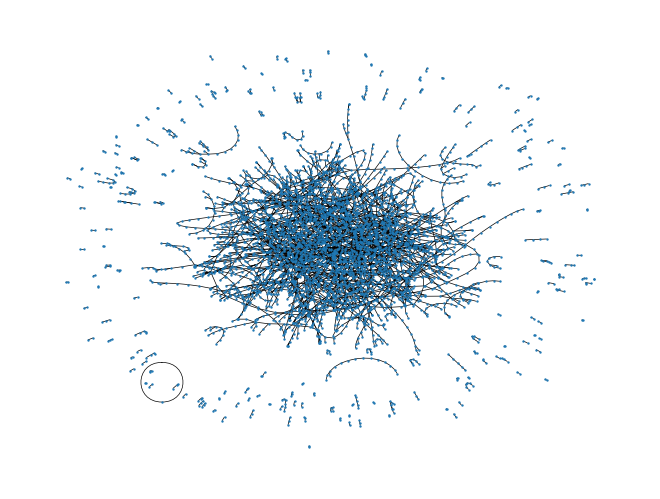

<Figure size 5000x5000 with 0 Axes>

In [6]:
nx.draw(G1, with_labels = False, node_size = .5, width = .5)
plt.figure(figsize=(50,50))
plt.show

## Find the degree of each node in G1 and draw a histogram: nodes on the x-axis and degree on the y-axis

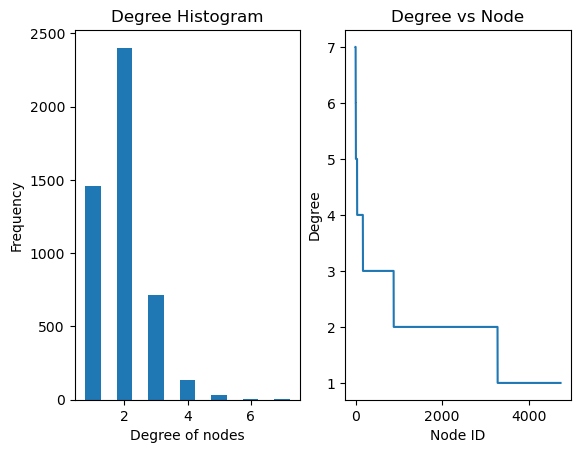

In [3]:
deg = sorted([d for n, d in G1.degree()], reverse=True)
degreeCount = collections.Counter(deg)
deg1, cnt = zip(*degreeCount.items())
fig, (fig1, fig2) = plt.subplots(1,2)
fig1.bar(deg1, cnt, width=.5)
fig1.set(xlabel="Degree of nodes", ylabel="Frequency", title= "Degree Histogram")

fig2.plot(deg)
fig2.set(xlabel="Node ID", ylabel="Degree", title= "Degree vs Node")

plt.show()

## Find the average degree of nodes in G1

In [4]:
avg_degree = sum(deg)/ G1.number_of_nodes()
print (avg_degree)

1.9231581169516572


## Find the number of edges in the graph G1

In [5]:
edges = G1.number_of_edges()
print(edges)

4555


## Construct a G2 from G1 by adding edges randomly to nodes in G1 whose degree is less than 5; For example if node 10 has a degree 3, we add two new edges (in random). Note that when you add an edge (10, 19), node 19 also gains a degree.

In [6]:
deg2 = nx.degree(G1)
G1_1= nx.subgraph(G1, [x for x in G1.nodes() if deg2[x]<5])
G2 = nx.Graph()
for node in G1_1.nodes():
    connected = [to for (fr, to) in G1_1.edges()]
    not_connected = [n for n in G1_1.nodes() if not n in connected]
    if len(connected):
        new = random.choice(not_connected)
        G2.add_edge(node, new)

deg3 = G2.degree()
rm_edge = []
for n in G2.nodes():
    if deg3[n]> 4:
        rm_edge.append (n)

G2.remove_nodes_from(rm_edge)

## Plot the subgraph G2 without node numbers

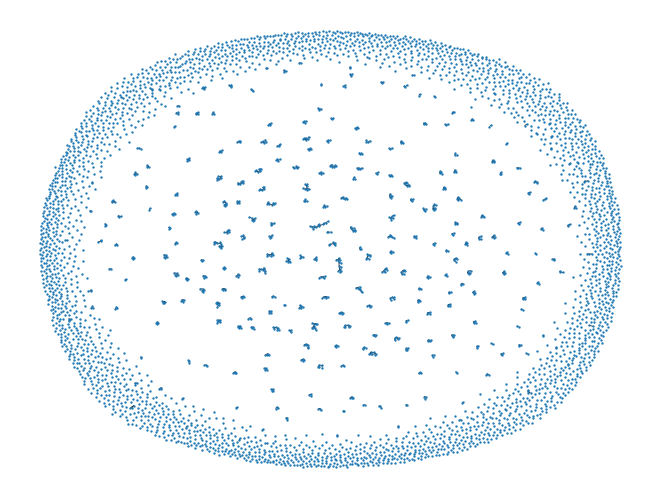

In [9]:
nx.draw(G2, with_labels = False, node_size = .5, width = .5 )
plt.show()

## Find the number of edges in the graph G2

In [10]:
G2.number_of_edges()

735

## Find the average degree of the graph G1 and G2

In [69]:
deg4 = pd.DataFrame(nx.degree(G2))
avg_degree_G2 = sum(deg4[1])/ G2.number_of_nodes()
print (f"Average Degree of G1: {avg_degree}")
print (f"Average Degree of G2: {avg_degree_G2}")


Average Degree of G1: 1.9231581169516572
Average Degree of G2: 0.3651266766020864


## Create erdos_renyni graph with same number of nodes as in G2 and call it H1

In [26]:
G2.number_of_nodes()

4026

In [33]:
H1 = nx.erdos_renyi_graph(4026,0.001)

## Plot the graph H1 without node numbers

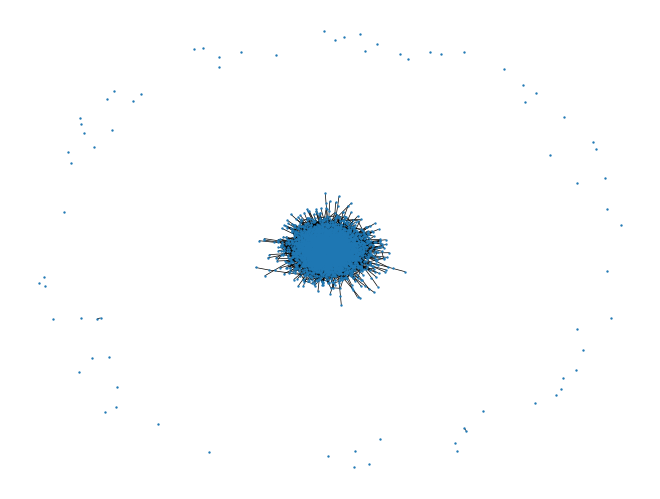

In [34]:
nx.draw(H1, with_labels = False, node_size = .5, width = .5 )
plt.show()

## Find the degree of each node in H1 and draw a histogram: nodes on the x-axis and degree on the y-axis

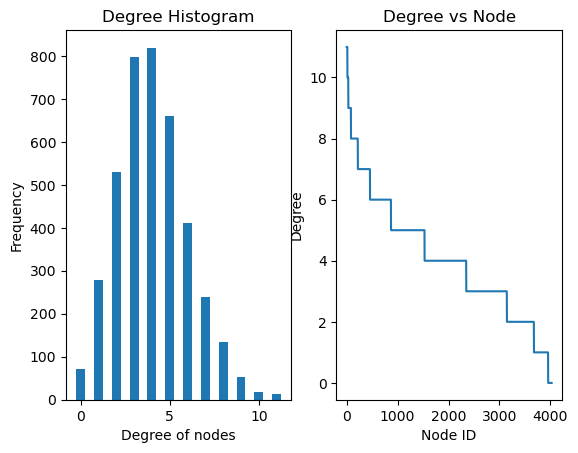

In [48]:
deg5 = sorted([d for m, d in H1.degree()], reverse=True)
degreeCount1 = collections.Counter(deg5)
deg6, cnt1 = zip(*degreeCount1.items())

fig, (fig1, fig2) = plt.subplots(1,2)
fig1.bar(deg6, cnt1, width=.5)
fig1.set(xlabel="Degree of nodes", ylabel="Frequency", title= "Degree Histogram")

fig2.plot(deg5)
fig2.set(xlabel="Node ID", ylabel="Degree", title= "Degree vs Node")

plt.show()

## Find the average degree of nodes in H1

In [49]:
deg7 = pd.DataFrame(nx.degree(H1))
avg_degree_H1 = sum(deg7[1])/ H1.number_of_nodes()
print (avg_degree_H1)

4.0541480377545955


## Construct a subgraph H2 from H1 by removing nodes whose degree is less than 2 times the average degree and nodes whose degree is greater than 2 times the avearge degree

In [70]:
h_deg = int(avg_degree_H1*2)
l_deg = int(avg_degree_H1/2)

In [55]:
deg8 = nx.degree(H1)
H2 = nx.subgraph(H1, [x for x in H1.nodes() if ((deg8[x]>2) and (deg8[x]<8) )])

## Plot the subgraph H2 without node numbers

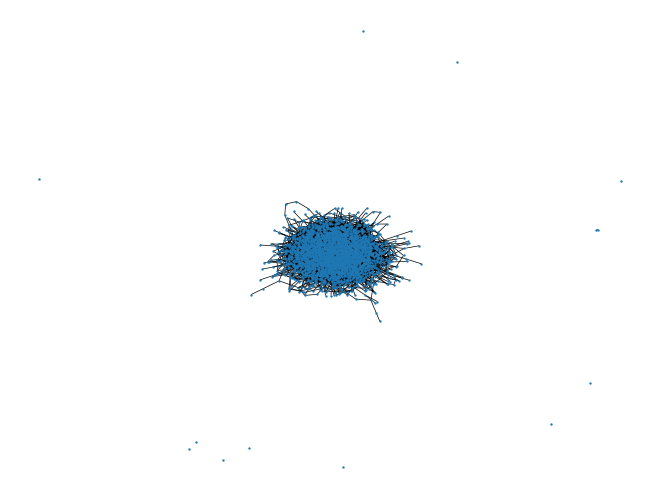

In [62]:
nx.draw(H2, with_labels = False, node_size = .5, width = .5, pos= nx.spring_layout(H2) )
plt.show()

## Compare G2 and H2

In [74]:
deg9 = pd.DataFrame(nx.degree(H2))
avg_degree_H2 = sum(deg9[1])/ H2.number_of_nodes()

deg10 = sorted([d for m, d in H2.degree()], reverse=True)
degreeCount2 = collections.Counter(deg10)
deg11, cnt2 = zip(*degreeCount2.items())

deg12 = sorted([d for m, d in G2.degree()], reverse=True)
degreeCount3 = collections.Counter(deg12)
deg13, cnt3 = zip(*degreeCount3.items())

Average Degree of G2 is 0.3651266766020864
Average Degree of H2 is 3.5989067304407243


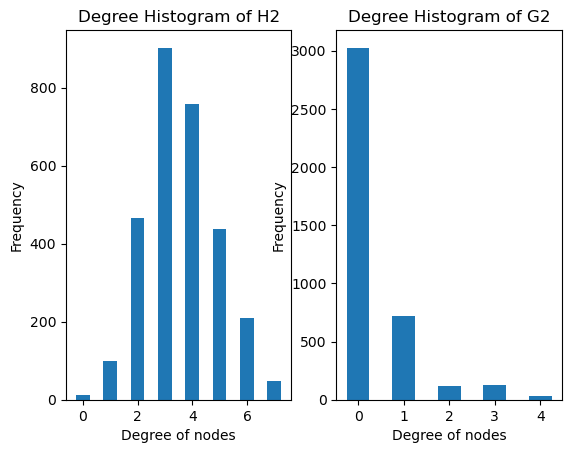

In [77]:
# Average Degree
print(f"Average Degree of G2 is {avg_degree_G2}")
print(f"Average Degree of H2 is {avg_degree_H2}")

# Degree Distribution 
fig, (fig1, fig2) = plt.subplots(1,2)
fig1.bar(deg11, cnt2, width=.5)
fig1.set(xlabel="Degree of nodes", ylabel="Frequency", title= "Degree Histogram of H2")
fig2.bar(deg13, cnt3, width=.5)
fig2.set(xlabel="Degree of nodes", ylabel="Frequency", title= "Degree Histogram of G2")

plt.show()
